In [128]:
import pandas as pd
import matplotlib as plt

In [129]:
data1 = pd.read_csv('layoffs.csv')
data2 = pd.read_csv('layoffs_data.csv')

In [130]:
print(data1.columns, len(data1.columns))
print(f"Data1 --- Columns: {len(data1.columns)}, Rows: {len(data1)}")
print(data2.columns, len(data2.columns))
print(f"Data2 --- Columns: {len(data2.columns)}, Rows: {len(data2)}")

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object') 9
Data1 --- Columns: 9, Rows: 3148
Index(['company', 'location', 'industry', 'percentage_laid_off', 'date',
       'source', 'funds_raised', 'stage', 'date_added', 'country',
       'total_laid_off', 'list_of_employees_laid_off'],
      dtype='object') 12
Data2 --- Columns: 12, Rows: 2738


In [131]:
data2.drop(columns=['source', 'date_added', 'list_of_employees_laid_off'], inplace=True)
print(data2.columns, len(data2.columns))
print(f"Data2 --- Columns: {len(data2.columns)}, Rows: {len(data2)}")

Index(['company', 'location', 'industry', 'percentage_laid_off', 'date',
       'funds_raised', 'stage', 'country', 'total_laid_off'],
      dtype='object') 9
Data2 --- Columns: 9, Rows: 2738


In [132]:
data = pd.concat([data1, data2])
print(f"Columns: {len(data.columns)}, Rows: {len(data)}")

Columns: 9, Rows: 5886


In [133]:
data = data.dropna(subset=['total_laid_off', 'percentage_laid_off'])
print(f"Columns: {len(data.columns)}, Rows: {len(data)}")

Columns: 9, Rows: 2873


In [134]:
data.drop_duplicates(inplace=True)
print(f"Columns: {len(data.columns)}, Rows: {len(data)}")

Columns: 9, Rows: 1513


In [135]:
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1,Viasat,San Diego,Other,800.0,0.10,2023-11-02,Post-IPO,United States,366.0
4,Informatica,SF Bay Area,Data,545.0,0.10,2023-11-01,Post-IPO,United States,NaN
5,Splunk,SF Bay Area,Data,500.0,0.07,2023-11-01,Post-IPO,United States,2400.0
6,Faire,SF Bay Area,Retail,250.0,0.20,2023-11-01,Series G,United States,1700.0
7,Sana Benefits,Austin,HR,73.0,0.50,2023-11-01,Series B,United States,106.0


### Q1: Which year had the most layoffs?

In [136]:
data_filtered = data[['date', 'total_laid_off']].copy()
data_filtered['year'] = data_filtered['date'].apply(lambda x: x.split('-')[0])
data_filtered = data_filtered[['year', 'total_laid_off']]

In [137]:
layoffs_by_year = data_filtered.groupby('year').sum()
layoffs_by_year

,total_laid_off
year,
2020,70621.0
2021,6503.0
2022,138732.0
2023,191290.0


In [138]:
max_index = layoffs_by_year['total_laid_off'].idxmax()
print(max_index)

2023


<Axes: xlabel='year'>

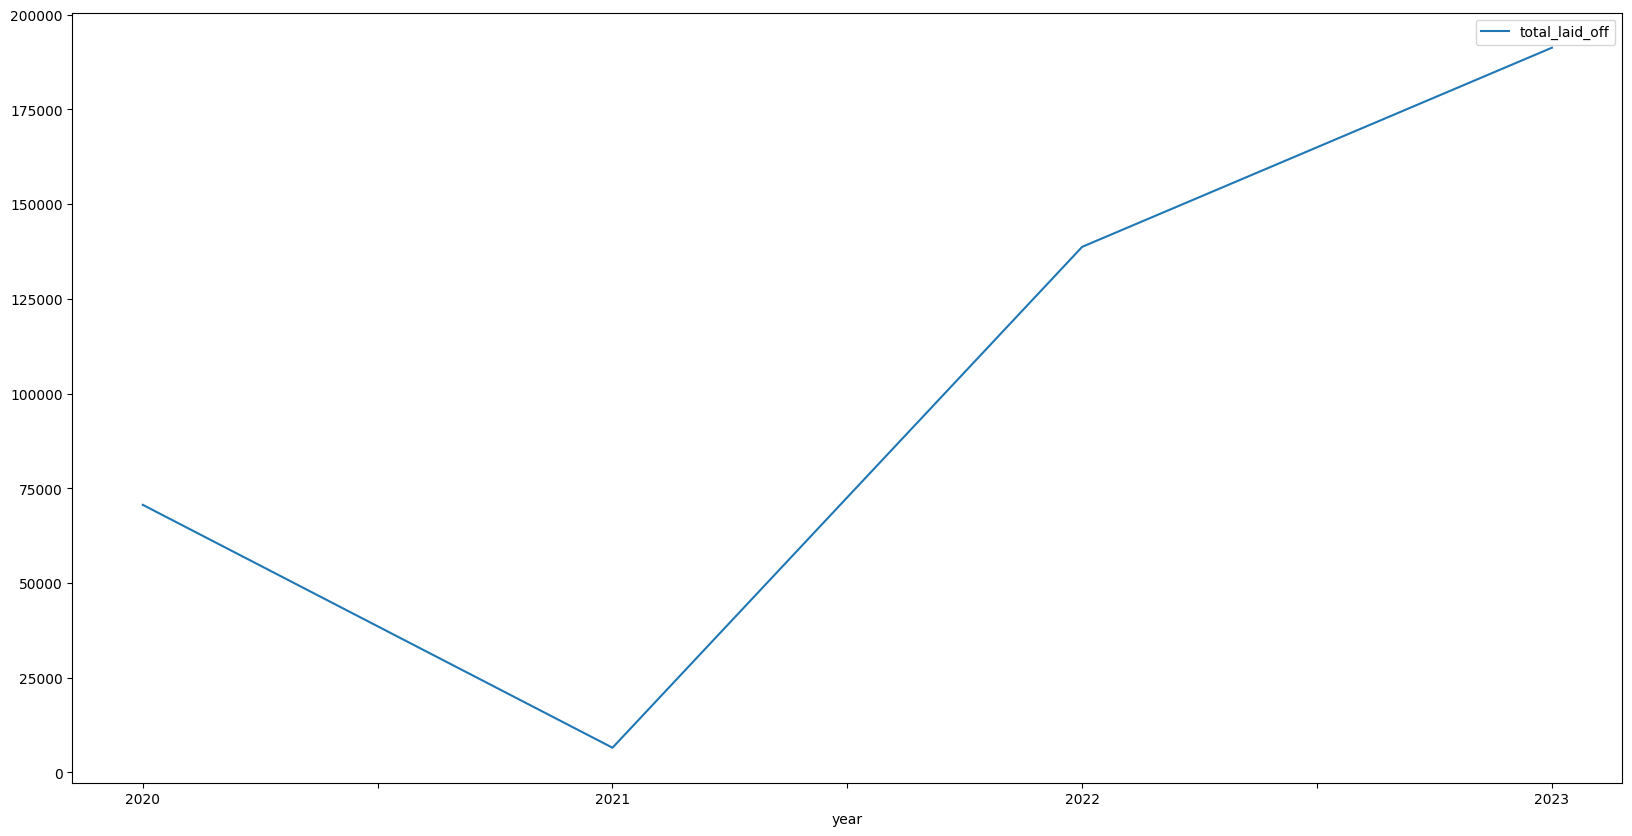

In [139]:
layoffs_by_year.plot(kind='line', figsize=(20, 10))

### Q2: Which country had the most layoffs?

In [140]:
layoffs_by_country = data[['country', 'total_laid_off']].groupby('country').sum()
layoffs_by_country

,total_laid_off
country,
Argentina,283.0
Australia,2936.0
Austria,340.0
Brazil,9266.0
Bulgaria,120.0
Canada,8971.0
Chile,295.0
China,755.0
Denmark,335.0


In [141]:
max_index = layoffs_by_country['total_laid_off'].idxmax()
print(max_index)

United States


### Q3: Which location in the United Stated had the most layoffs?

In [142]:
data_filtered = data[['country', 'location', 'total_laid_off']]
layoffs_in_us = data_filtered[data_filtered['country'] == 'United States'][['location', 'total_laid_off']].groupby('location').sum()
layoffs_in_us

,total_laid_off
location,
Albany,371.0
Ann Arbor,240.0
Atlanta,2025.0
Austin,10562.0
Baltimore,196.0
Bend,50.0
Boise,7200.0
Boston,11049.0
Boulder,258.0


In [143]:
max_index = layoffs_in_us['total_laid_off'].idxmax()
print(max_index)

SF Bay Area


<Axes: xlabel='location'>

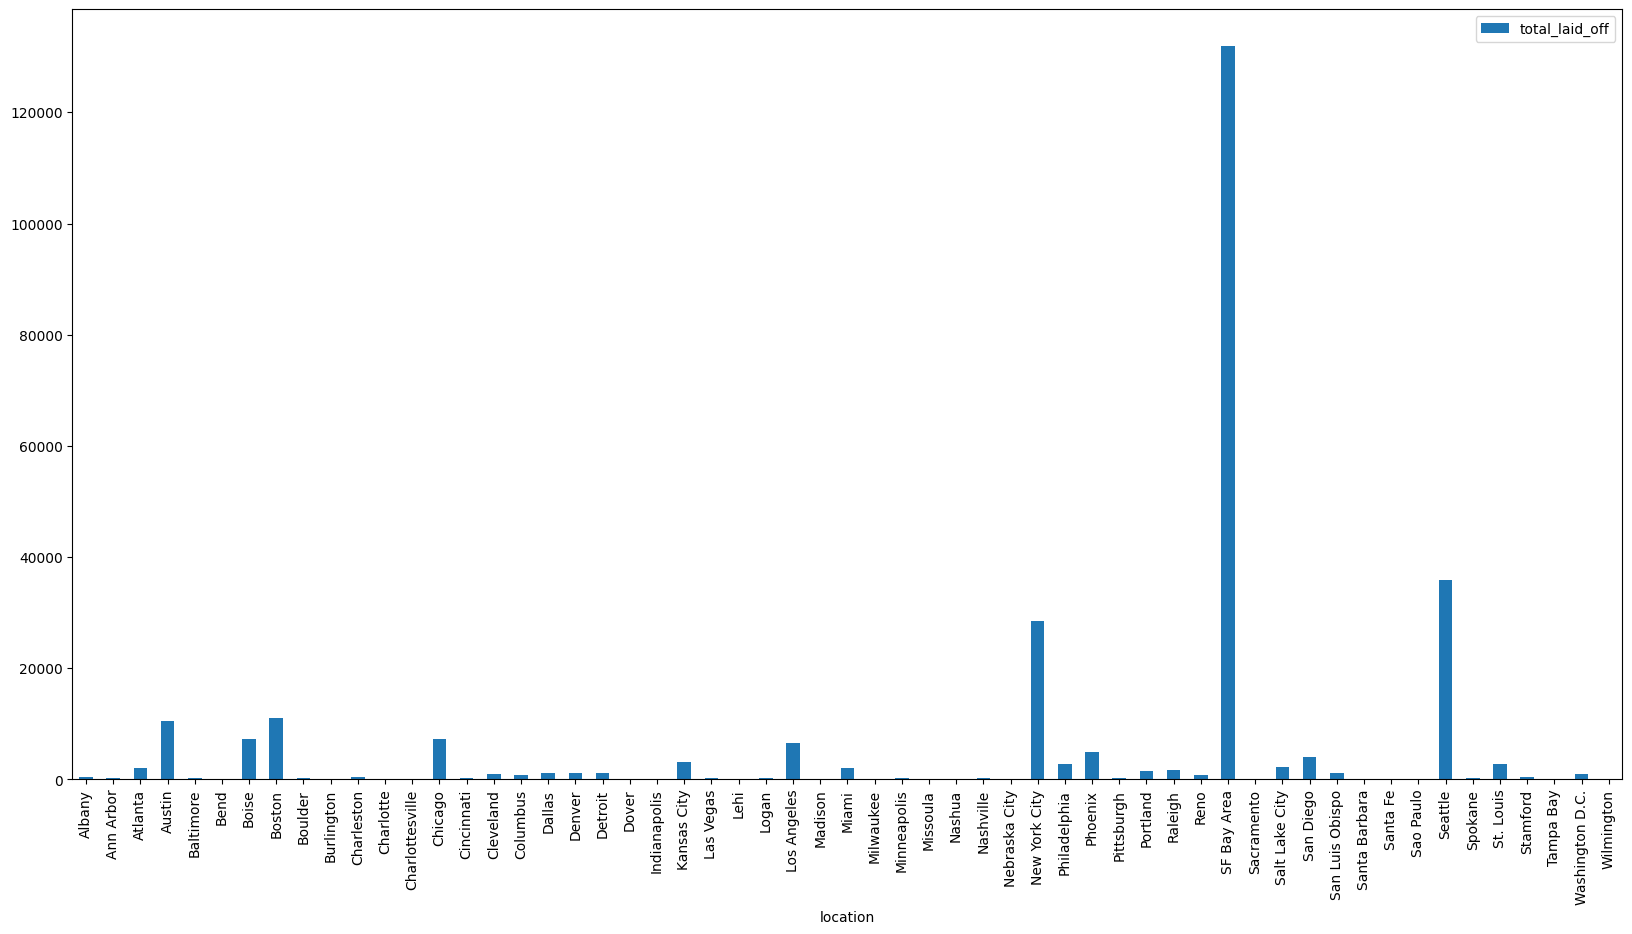

In [144]:
layoffs_in_us.plot.bar(figsize=(20,10))

### Q4: Which industry had the most layoffs over a period of four years?

In [145]:
layoffs_by_industry = data[['industry', 'total_laid_off']].groupby('industry').sum()
layoffs_by_industry

,total_laid_off
industry,
AI,20.0
Aerospace,783.0
Construction,3703.0
Consumer,41766.0
Crypto,11651.0
Data,6543.0
Education,8467.0
Energy,407.0
Finance,29963.0


In [146]:
max_index = layoffs_by_industry['total_laid_off'].idxmax()
print(max_index)

Retail


<Axes: xlabel='industry'>

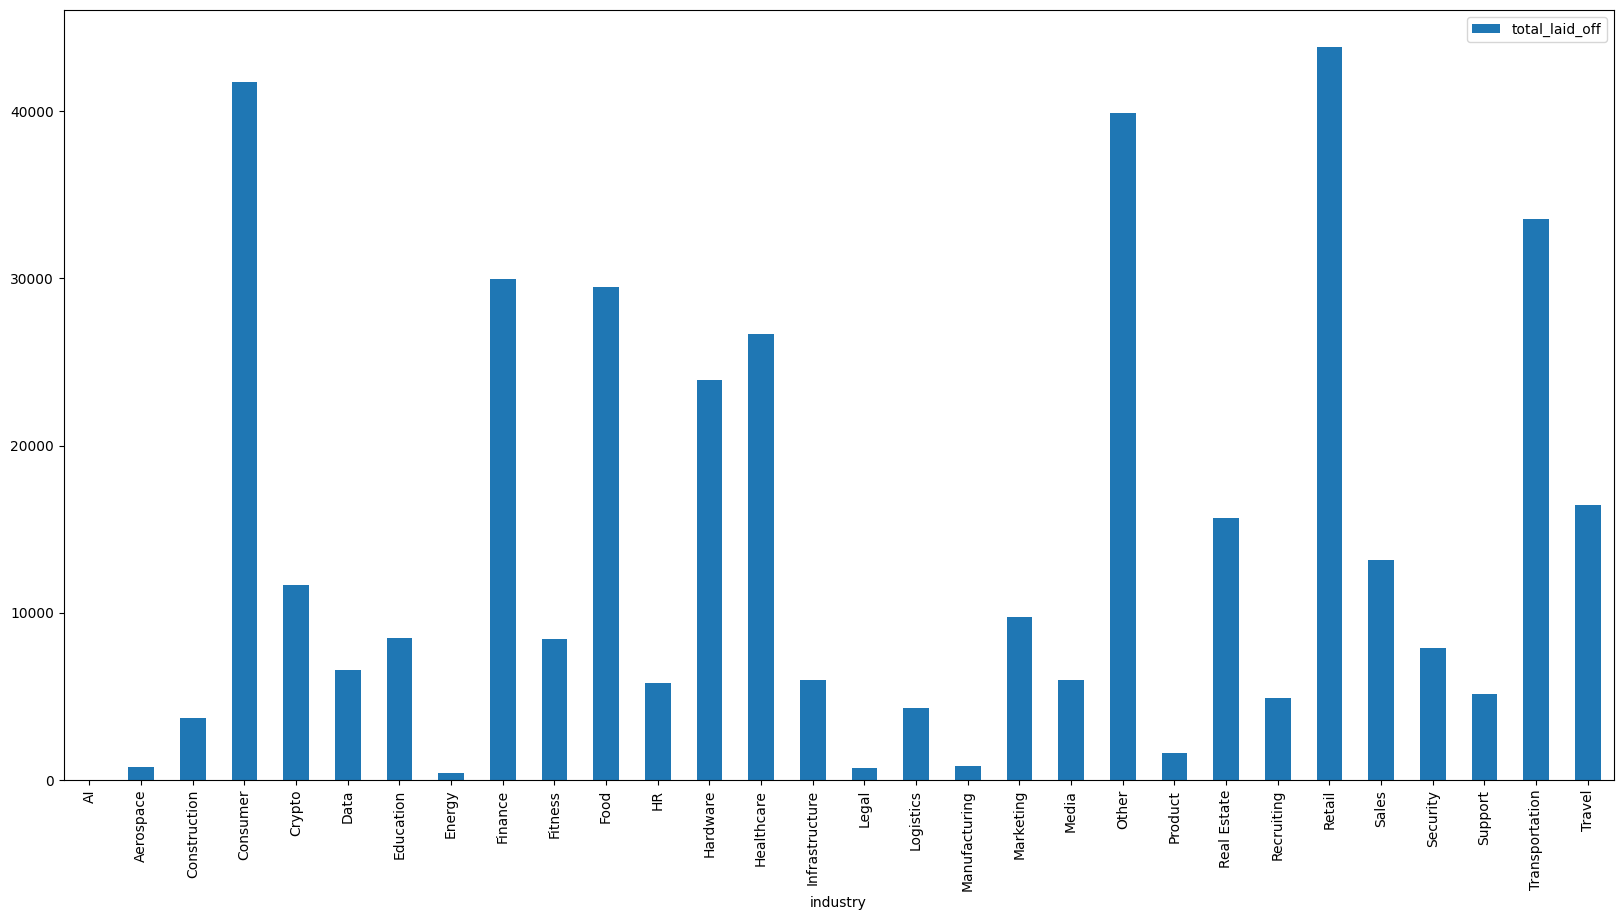

In [147]:
layoffs_by_industry.plot.bar(figsize=(20,10))

### Q5.a: Which company had the most layoffs in terms of number of people over four years?

In [148]:
layoffs_by_company = data[['company', 'total_laid_off']].groupby('company').sum()
layoffs_by_company

,total_laid_off
company,
#Paid,19.0
&Open,9.0
10X Genomics,100.0
1K Kirana,600.0
1stdibs,70.0
...,...
iFood,355.0
iPrice Group,50.0
iRobot,225.0


In [149]:
max_index = layoffs_by_company['total_laid_off'].idxmax()
print(max_index)

Amazon


### Q5.b: Which company had the most layoffs in terms of percentage of company over four years?

In [150]:
layoffs_by_company = data[['company', 'percentage_laid_off']].groupby('company').sum()
layoffs_by_company

,percentage_laid_off
company,
#Paid,0.17
&Open,0.09
10X Genomics,0.08
1K Kirana,0.40
1stdibs,0.17
...,...
iFood,0.06
iPrice Group,0.20
iRobot,0.17


In [151]:
max_index = layoffs_by_company['percentage_laid_off'].idxmax()
print(max_index)

Pear Therapeutics


### Q6: Which stage of funding had the most layoffs?

In [152]:
layoffs_by_stage = data[['stage', 'total_laid_off']].groupby('stage').sum()
layoffs_by_stage

,total_laid_off
stage,
Acquired,31228.0
Post-IPO,229395.0
Private Equity,7647.0
Seed,1575.0
Series A,4951.0
Series B,23760.0
Series C,16374.0
Series D,18906.0
Series E,14937.0


In [153]:
max_index = layoffs_by_stage['total_laid_off'].idxmax()
print(max_index)

Post-IPO


array([<Axes: ylabel='total_laid_off'>], dtype=object)

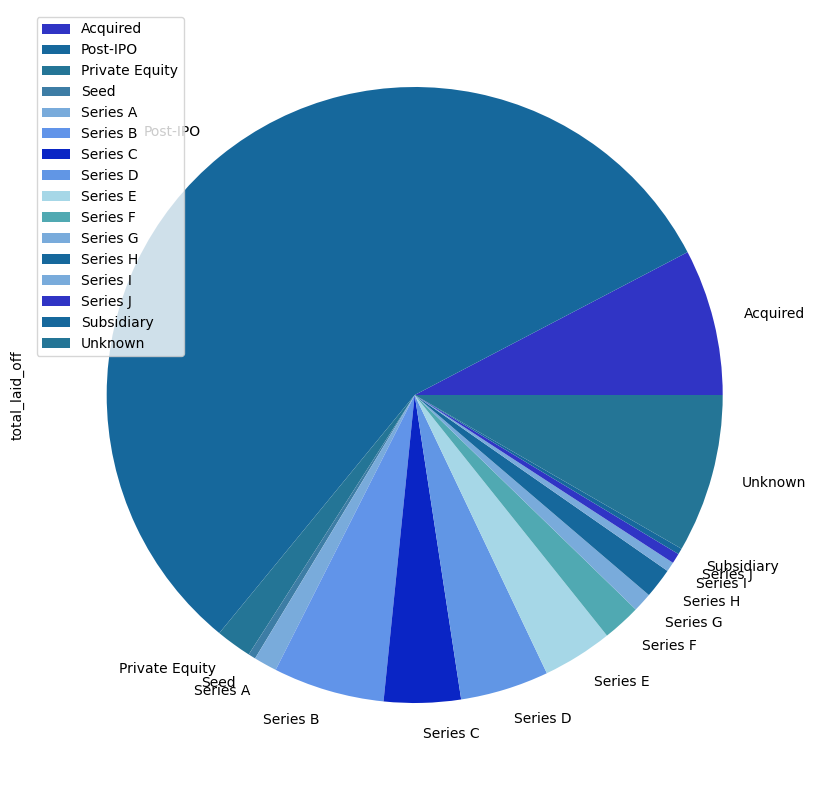

In [154]:
layoffs_by_stage.plot.pie(figsize=(10,10), subplots=True, colors=['#3034c5', '#16689c', '#247596', '#3d7da5', '#79abdb', '#6194e9', '#0a25c5', '#6196e5', '#a6d7e7', '#50a9b2', '#79abdb', '#16689c', '#79abdb'])